In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/netflix_dataset.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# How many movies and series has Netflix?

In [ ]:
total_prod = data['type'].value_counts()

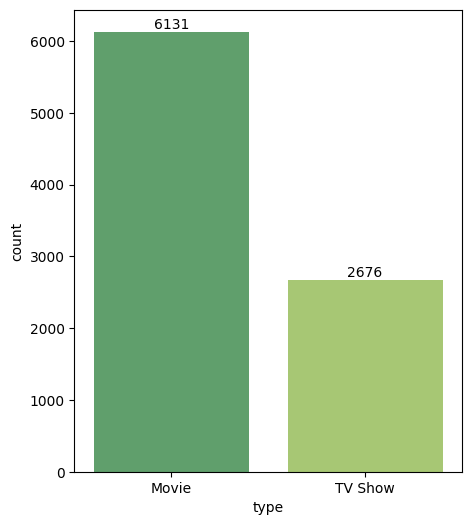

In [ ]:
plt.figure(figsize=(5,6))

sns.countplot(x=data['type'], data=data, palette="summer")

for i, count in enumerate(total_prod):
  plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# What is the most common classification?

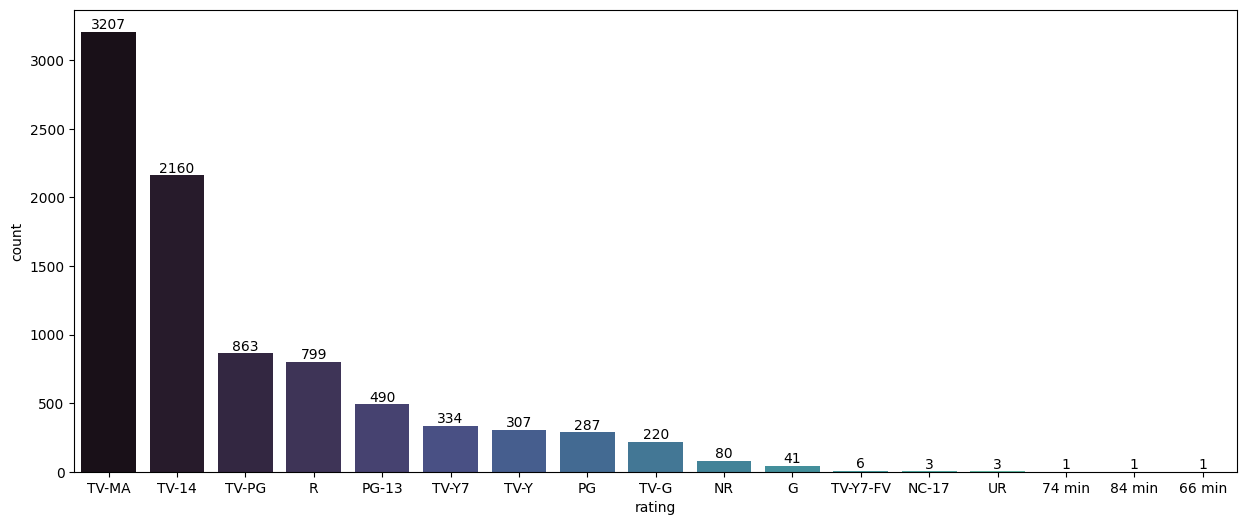

In [ ]:
plt.figure(figsize=(15,6))

count_data = data['rating'].value_counts()
order = count_data.sort_values(ascending=False).index

sns.countplot(x=data['rating'], data=data, palette='mako', order=order)

for i, count in enumerate(count_data):
  plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

# What is the most common classification in movies and tv serie?

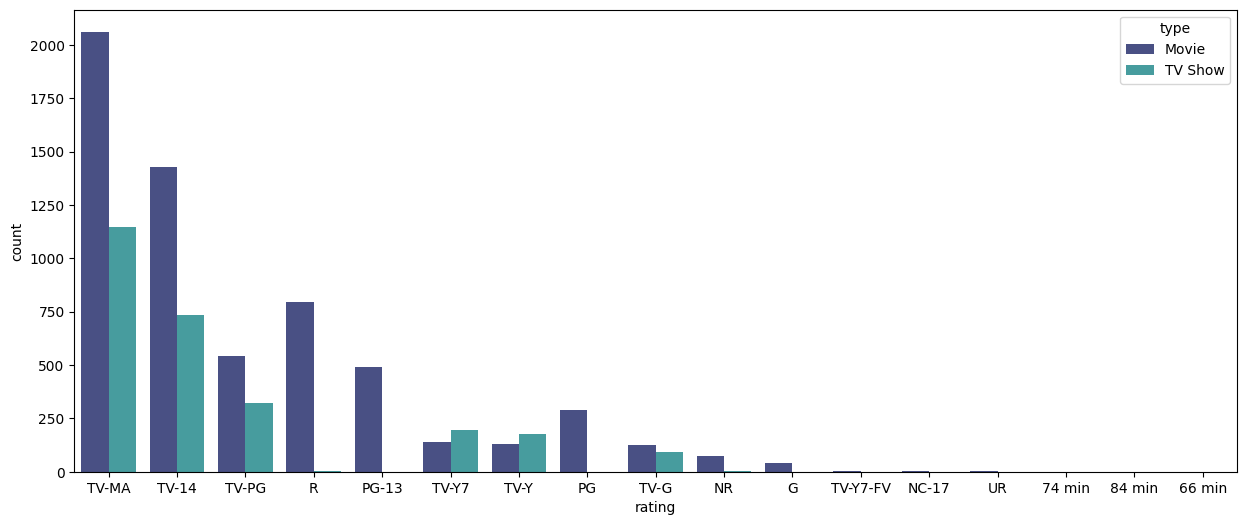

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(x=data['rating'], data=data, palette='mako', hue=data['type'], order=order)

plt.show()

# Movies

In [ ]:
data_movie = data[data['type'] == 'Movie']

## What directors have more movies?

In [ ]:
data_director = data_movie['director'].value_counts()
data_director

Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: director, Length: 4354, dtype: int64

In [ ]:
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,director
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14


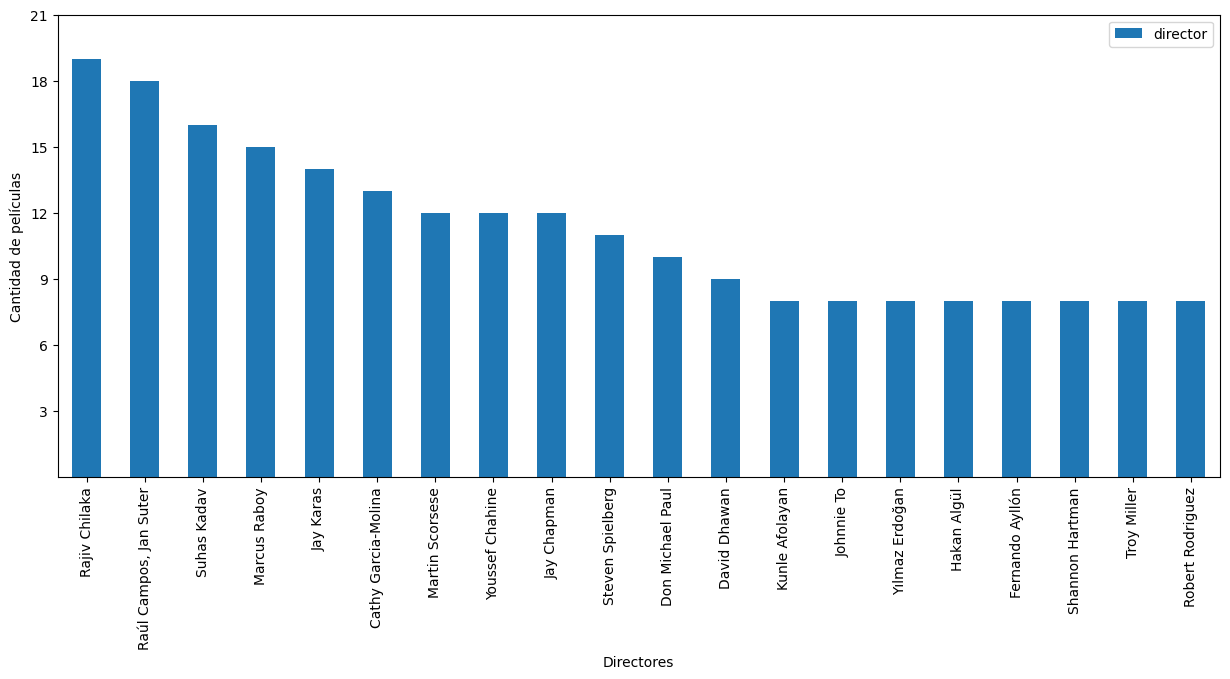

In [ ]:
data_directorFrame[:20].plot(kind='bar', figsize=[15,6])

plt.ylabel('Cantidad de películas')
plt.xlabel('Directores')
plt.yticks([3, 6, 9, 12, 15, 18, 21])

plt.show()

## What actors have more movies?

In [ ]:
data_movie_actor = data_movie.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data_movie_actor = pd.DataFrame(data_movie_actor)
data_movie_actor.head()

,0
title,
My Little Pony: A New Generation,Vanessa Hudgens
My Little Pony: A New Generation,Kimiko Glenn
My Little Pony: A New Generation,James Marsden
My Little Pony: A New Generation,Sofia Carson
My Little Pony: A New Generation,Liza Koshy


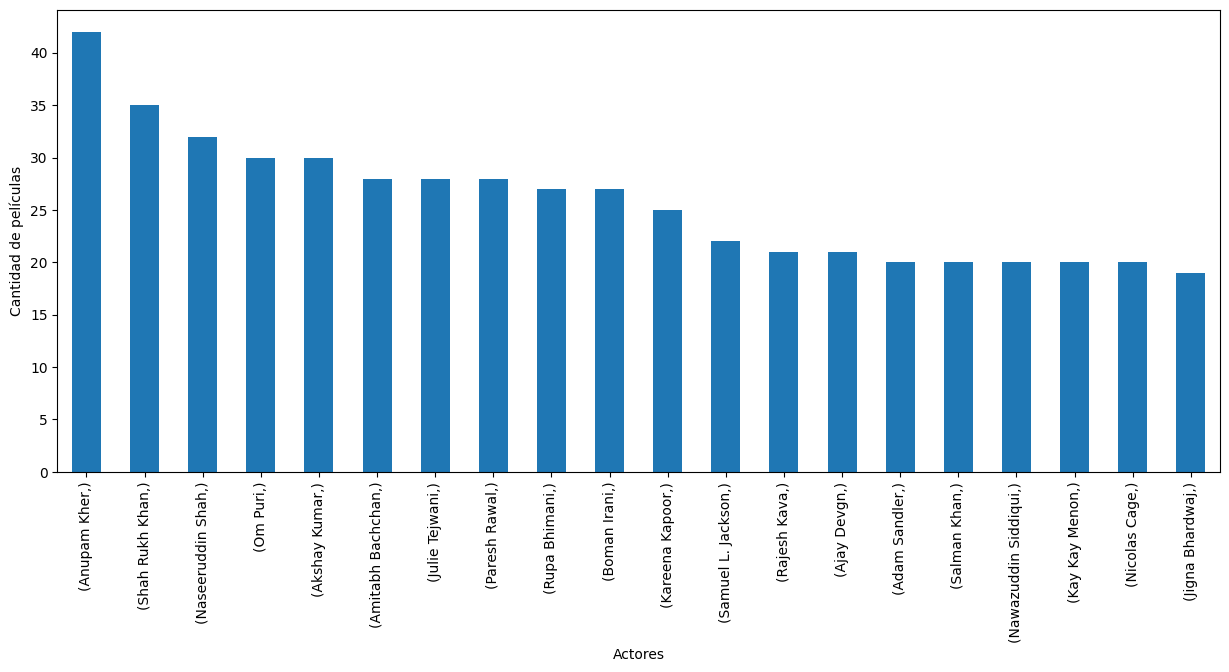

In [ ]:
top_actors_movie = data_movie_actor.value_counts()

top_actors_movie[:20].plot(kind='bar', figsize=[15,6])

plt.ylabel('Cantidad de películas')
plt.xlabel('Actores')
#plt.yticks([3, 6, 9, 12, 15, 18, 21])

plt.show()

# Top genres by movie

In [ ]:
data_movie_list_in = data_movie.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data_movie_list_in

title
Dick Johnson Is Dead                           Documentaries
My Little Pony: A New Generation    Children & Family Movies
Sankofa                                               Dramas
Sankofa                                   Independent Movies
Sankofa                                 International Movies
                                              ...           
Zoom                                Children & Family Movies
Zoom                                                Comedies
Zubaan                                                Dramas
Zubaan                                  International Movies
Zubaan                                      Music & Musicals
Length: 13190, dtype: object

In [ ]:
top_list_in = data_movie_list_in.value_counts()
top_list_in

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
dtype: int64

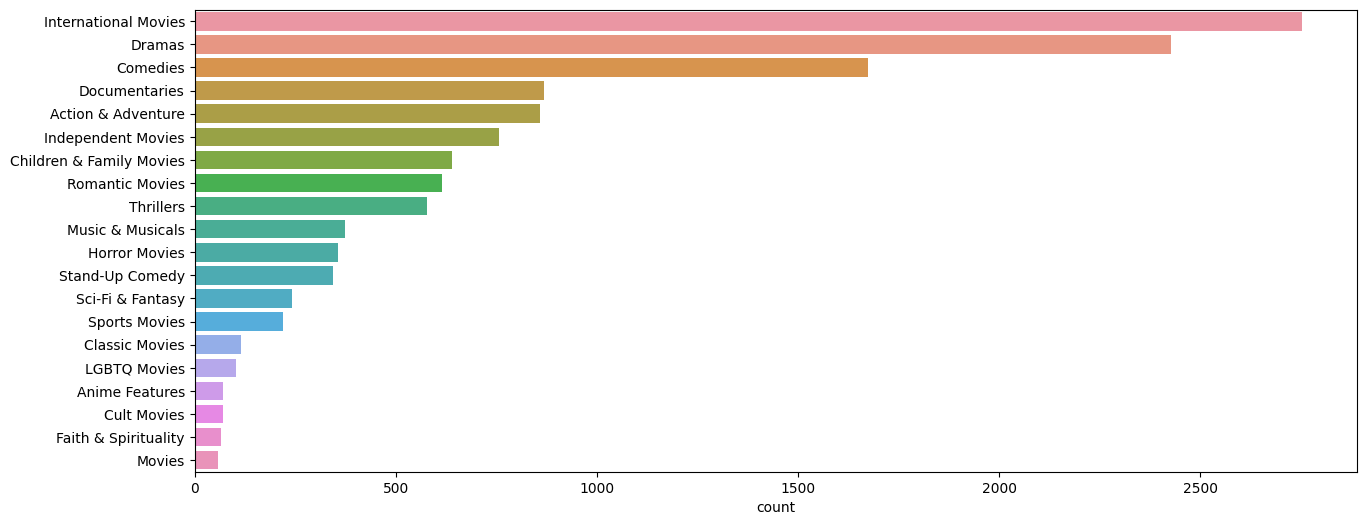

In [ ]:
plt.figure(figsize=(15,6))

sns.countplot(y = data_movie_list_in, order=data_movie_list_in.value_counts().index[:20])

plt.show()

# Productions by year

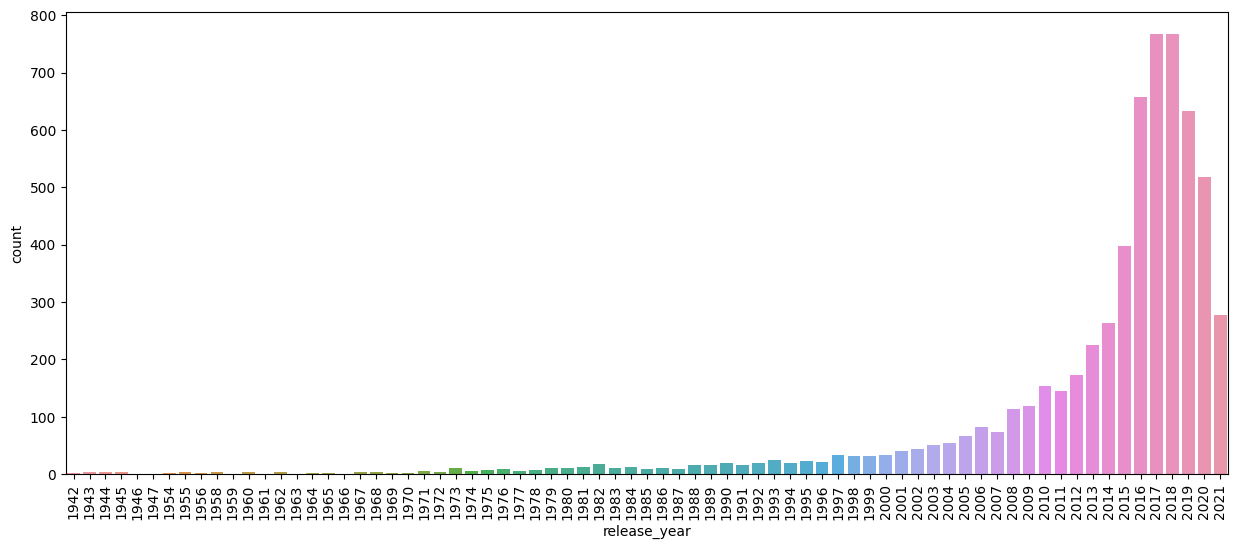

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=data_movie['release_year'], data=data_movie)

plt.xticks(rotation=90)
plt.show()

# Countries with the most movies produced

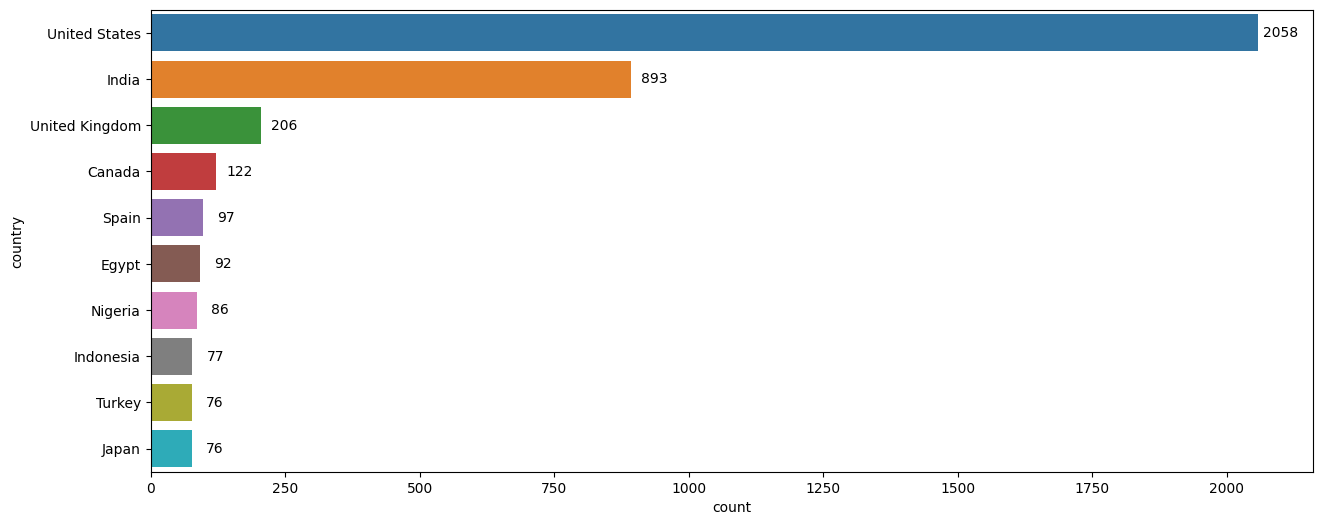

In [ ]:
plt.figure(figsize=(15,6))

ax = sns.countplot(y='country', data=data_movie, order=data_movie['country'].value_counts().index[:10])

for p in ax.patches:
  ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 30, p.get_y() + p.get_height() / 2),
            ha="center", va='center', xytext = (5, 0), textcoords='offset points')
  


plt.show()

# TV Series

In [ ]:
data_tv = data[data['type'] == 'TV Show']

## What directors have more tv series?

In [ ]:
data_director = data_tv['director'].value_counts()
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,director
Alastair Fothergill,3
Rob Seidenglanz,2
Hsu Fu-chun,2
Iginio Straffi,2
Shin Won-ho,2


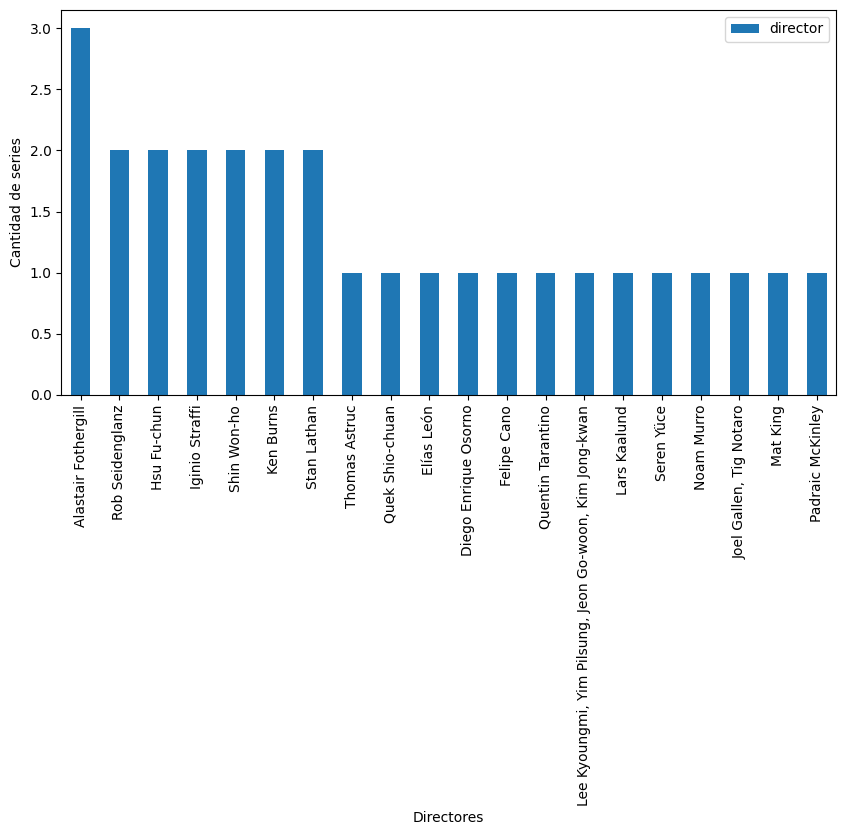

In [ ]:
data_directorFrame[:20].plot(kind='bar', figsize=[10,5])
plt.ylabel('Cantidad de series')
plt.xlabel('Directores')
plt.show()

## What actors have more tv serie?

In [ ]:
data_tv_actor = data_tv.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data_tv_actor = pd.DataFrame(data_tv_actor)
data_tv_actor.head()

,0
title,
Blood & Water,Ama Qamata
Blood & Water,Khosi Ngema
Blood & Water,Gail Mabalane
Blood & Water,Thabang Molaba
Blood & Water,Dillon Windvogel


In [ ]:
top_actors_tv = data_tv_actor.value_counts()
top_actors_tv

Takahiro Sakurai         25
Yuki Kaji                19
Junichi Suwabe           17
Daisuke Ono              17
Ai Kayano                17
                         ..
Ivy Yin                   1
Iván Pellicer             1
Iván Álvarez de Araya     1
Iza Moreira               1
Şükrü Özyıldız            1
Length: 14863, dtype: int64

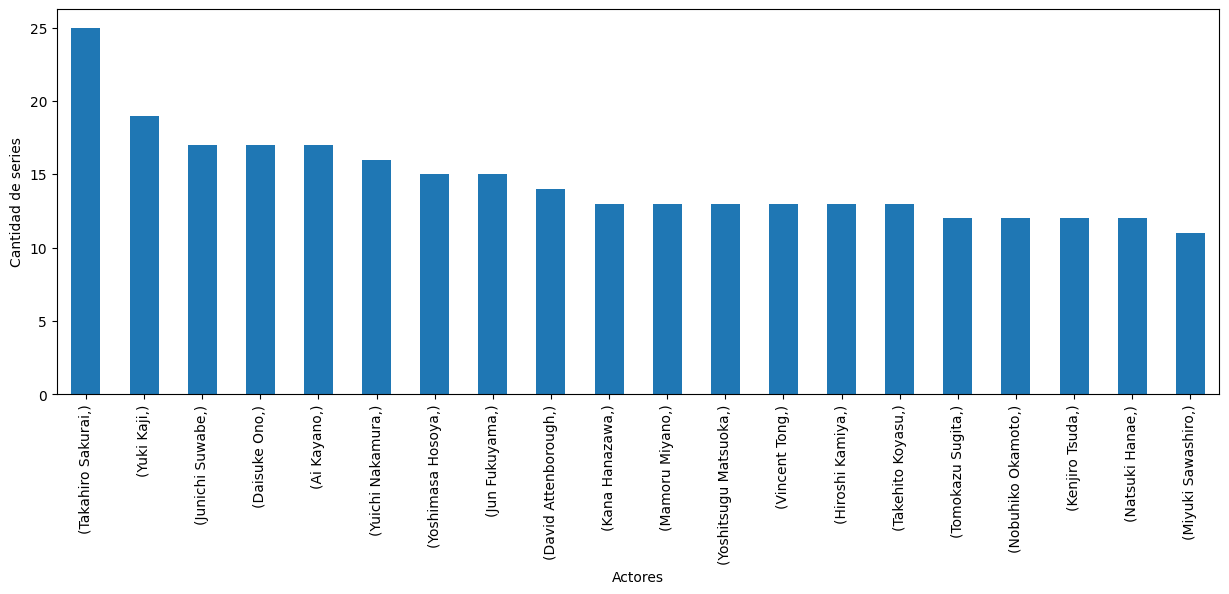

In [ ]:
top_actors_tv[:20].plot(kind='bar', figsize=[15,5])
plt.ylabel('Cantidad de series')
plt.xlabel('Actores')
plt.show()

## Top genres by tv serie

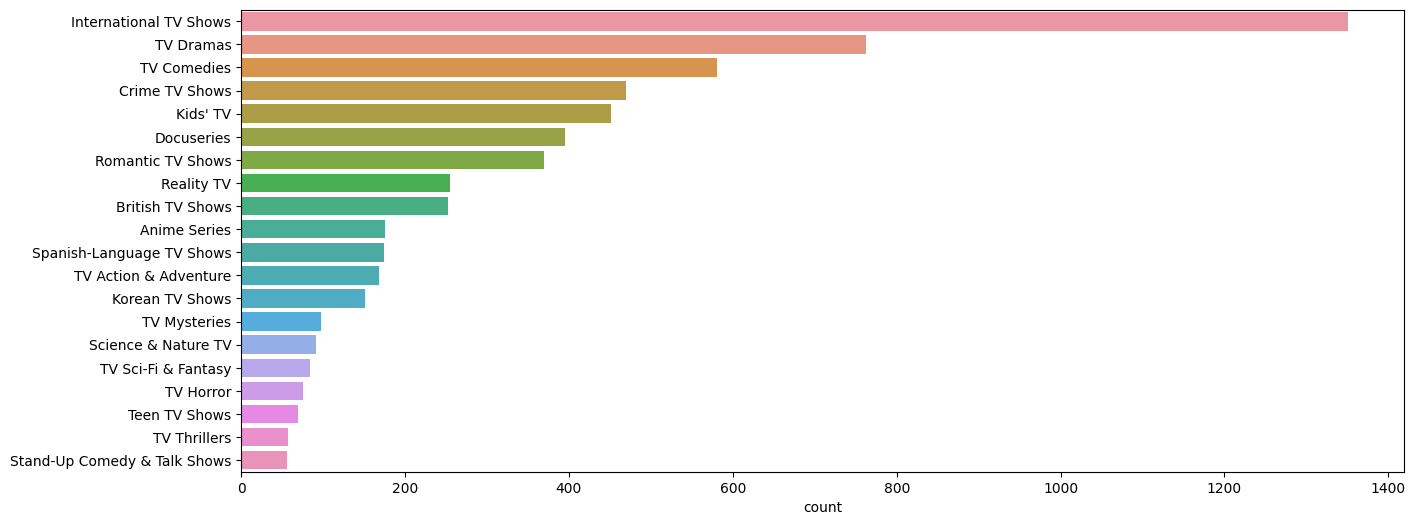

In [ ]:
plt.figure(figsize=(15,6))
data_tv_list_in = data_tv.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = data_tv_list_in, order=data_tv_list_in.value_counts().index[:20])
plt.show()


# Productions by year

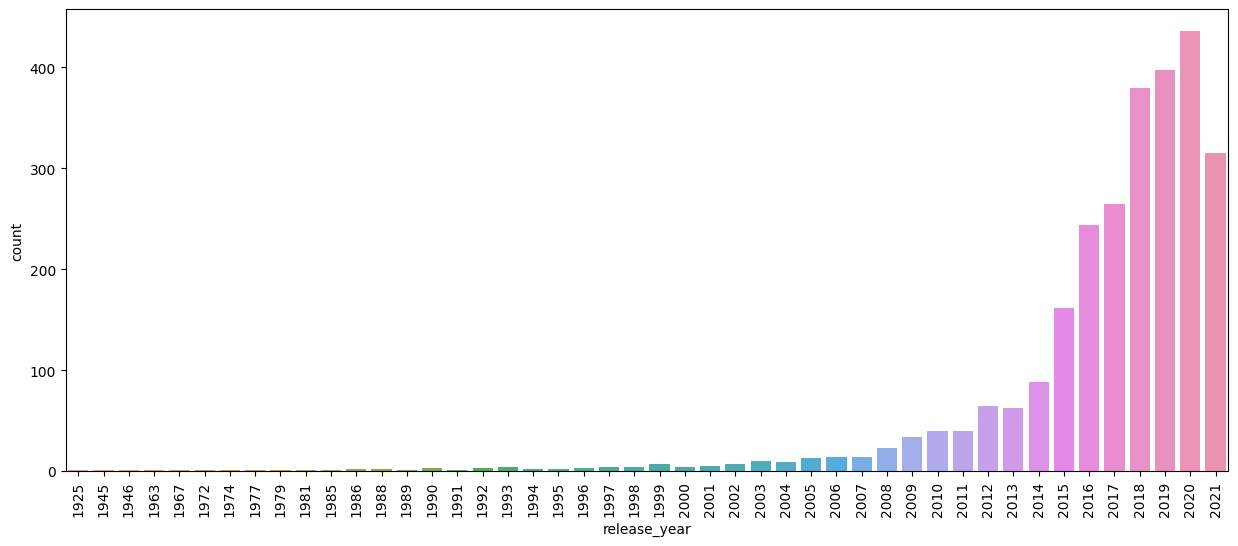

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=data_tv['release_year'], data=data_tv)

plt.xticks(rotation=90)
plt.show()

## Countries with the most tv series produced

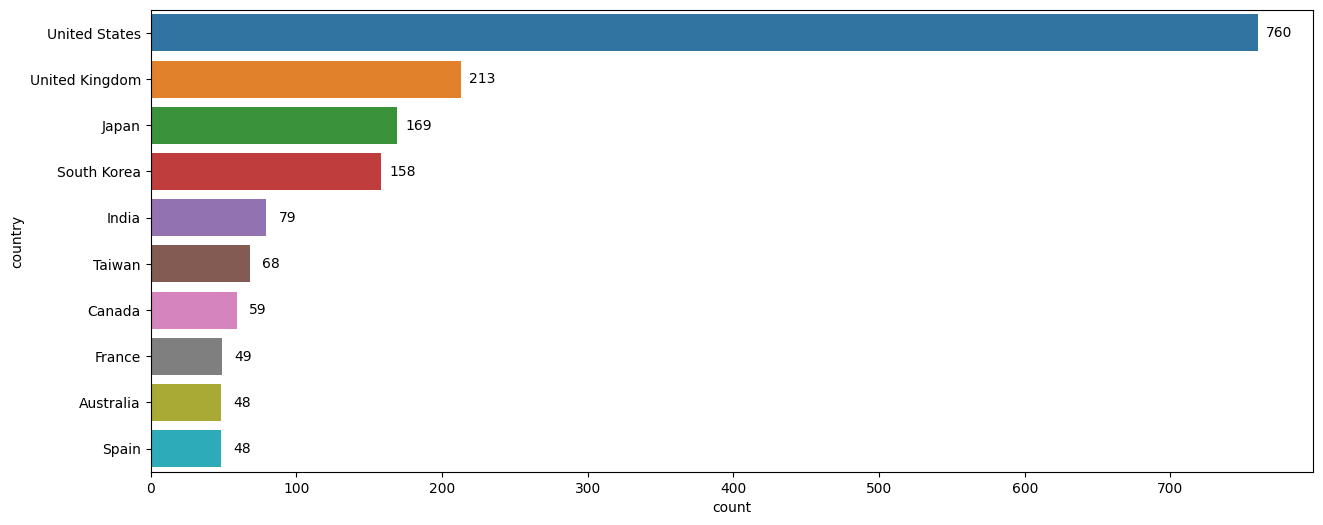

In [ ]:
plt.figure(figsize=(15,6))

ax = sns.countplot(y='country', data=data_tv, order=data_tv['country'].value_counts().index[:10])

for p in ax.patches:
  ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 10, p.get_y() + p.get_height() / 2),
            ha="center", va='center', xytext = (5, 0), textcoords='offset points')
  


plt.show()